Code cleanup. Upon analyzing the code, it looks like
1. repeated sentences
2. There's some shit going on with emojis
3. There are some words concatenated together, especially the last word of a sentence and the first word of the next sentence.
We need to get rid of these things.
Data cleaning.

In [2]:
LIST_OF_CHANNEL_IDS = [
"UCsDmESjqNPukDmVnuneLrqw",
"UCY6Ij8zOds0WJEeqCLOnqOQ",
"UClN24S5-fc7LD0JJW0FdGWw",
"UC3iNdSV_RQU7DHTGpqEW96w",
"UC_52i6mlrzOZs_NEuSepzAg",
"UCr3cBLTYmIK9kY0F_OdFWFQ",
"UCV6g95OBbVtFmN9uiJzkFqQ",
"UCgCKYs56-LKEPGQ99DzqQOg",
"UCOwxx9VnEnlFKt5EB70KTzQ",
"UC2Ds30pkifFVD0CE08wF50g",
"UC7UGbBVrqLlq6CRxWWUmyKw",
"UCn1XB-jvmd9fXMzhiA6IR0w",
"UCFeqAfEuKm7lIg2ddQzh61A",
"UCAlxwHEm1bWWYoe5VCSQYEg",
"UCz7iJPVTBGX6DNO1RNI2Fcg",
"UCOAUz4d1NUNxSHh_SOJtdGQ",
"UCGGTAB19HlHEWPwwmxHsEKA",
"UCOsATJw-IZgqGT8MFrHjKGg",
"UCsKVP_4zQ877TEiH_Ih5yDQ",
"UCOinp9hALPUcZeoL3Kmaviw",
"UCGwu0nbY2wSkW8N-cghnLpA",
"UCu6v4AdYxVH5fhfq9mi5llA",
"UCj74rJ9Lgl3WTngq675wxKg",
"UCNIuvl7V8zACPpTmmNIqP2A",
"UCo8bcnLyZH8tBIH9V1mLgqQ",
"UCR0O-1cvuPNxDosvSDLpWHg",
"UCvUmwreRrbxeR1mbmojj8fg",
"UCUKi4zY5ETSqrKAjTBgjM-g",
"UCDQBZcjYKP1J1Nu-Y0_D37Q",
"UCQ9HvHH-KRYHI5ynj2kbLwQ",
"UCRfg0SWjIHm_h95e4V8X5og",
"UCWPB0WpnMIy-g7zncwIhvQg",
"UCC-slLJZ4p4HOznMUcFn_2g"]

1. Find all files in all 'txt' directories.

In [7]:
import glob
import json
import regex as re
import os
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.corpus.reader import *
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiwonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiwonlee/nltk_data...


In [11]:
def generateListOfWords(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
        strippedLines = [line.strip() for line in lines if line.strip()]
        removedDuplicateLinesList = []
        if len(strippedLines) == 1:
            removedDuplicateLinesList.append(strippedLines[0])
        else:
            for index in range(len(strippedLines)-1):
                if (strippedLines[index] != strippedLines[index+1]*2):
                    removedDuplicateLinesList.append(strippedLines[index])
        listOfListOfWords = [line.split() for line in removedDuplicateLinesList]
        cleanedListOfWords = flattenListAndCleanWords(listOfListOfWords)
    return cleanedListOfWords

def flattenListAndCleanWords(listOfListOfWords):
    all_stopwords = list(stopwords.words('english'))
    cleanedListOfWords = []
    for listOfWords in listOfListOfWords:
        for words in listOfWords:
            word = re.split('[?."(),!)]', words)
            for wo in word:
                if wo !='' and wo not in all_stopwords:
                    cleanedListOfWords.append(wo)
    
    return cleanedListOfWords

def flattenList(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

wordCloud = {}
for channelId in LIST_OF_CHANNEL_IDS:
    listOfWords = []
    for txtFilePath in glob.glob(channelId+"/txt/*.txt"):
        listOfWords.append(generateListOfWords(txtFilePath))
    flattened = flattenList(listOfWords)
    wordCloud[channelId.split('/')[0]] = flattened
    print(channelId.split('/')[0], ": ", len(flattened), "words total")

    # with open(channelId.split('/')[0]+"wordCloud.txt", 'w') as f:
    #     json.dump(flattened, f)

UCsDmESjqNPukDmVnuneLrqw :  147899 words total
UCY6Ij8zOds0WJEeqCLOnqOQ :  305919 words total
UClN24S5-fc7LD0JJW0FdGWw :  20069 words total
UC3iNdSV_RQU7DHTGpqEW96w :  72556 words total
UC_52i6mlrzOZs_NEuSepzAg :  10943 words total
UCr3cBLTYmIK9kY0F_OdFWFQ :  37045 words total
UCV6g95OBbVtFmN9uiJzkFqQ :  50815 words total
UCgCKYs56-LKEPGQ99DzqQOg :  86115 words total
UCOwxx9VnEnlFKt5EB70KTzQ :  35488 words total
UC2Ds30pkifFVD0CE08wF50g :  21861 words total
UC7UGbBVrqLlq6CRxWWUmyKw :  114149 words total
UCn1XB-jvmd9fXMzhiA6IR0w :  122282 words total
UCFeqAfEuKm7lIg2ddQzh61A :  36896 words total
UCAlxwHEm1bWWYoe5VCSQYEg :  32871 words total
UCz7iJPVTBGX6DNO1RNI2Fcg :  9756 words total
UCOAUz4d1NUNxSHh_SOJtdGQ :  48430 words total
UCGGTAB19HlHEWPwwmxHsEKA :  14094 words total
UCOsATJw-IZgqGT8MFrHjKGg :  11945 words total
UCsKVP_4zQ877TEiH_Ih5yDQ :  31885 words total
UCOinp9hALPUcZeoL3Kmaviw :  13798 words total
UCGwu0nbY2wSkW8N-cghnLpA :  79156 words total
UCu6v4AdYxVH5fhfq9mi5llA :  373

Time to analyze using VADER (Valence Aware Dictionary for Sentiment Reasoning) model.

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

print(len(wordCloud.keys()))
for channelId in LIST_OF_CHANNEL_IDS:
    for words in wordCloud[channelId]:
        pol_score = sia.polarity_scores(words)
        pol_score['words']=words
        results.append(pol_score)
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df

33


,neg,neu,pos,compound,words
0,0.0,0.0,0.0,0.0000,I
1,1.0,0.0,0.0,-0.3182,lost
2,0.0,1.0,0.0,0.0000,suitcaseRiding
3,0.0,1.0,0.0,0.0000,runaway
4,0.0,1.0,0.0,0.0000,trainGot
...,...,...,...,...,...
1940659,0.0,1.0,0.0,0.0000,Bird
1940660,0.0,1.0,0.0,0.0000,2I
1940661,0.0,0.0,1.0,0.4404,hope
1940662,0.0,0.0,1.0,0.5106,enjoyed


In [17]:
df['label']=0

df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1

df.head()

,neg,neu,pos,compound,words,label
0,0.0,0.0,0.0,0.0000,I,0
1,1.0,0.0,0.0,-0.3182,lost,-1
2,0.0,1.0,0.0,0.0000,suitcaseRiding,0
3,0.0,1.0,0.0,0.0000,runaway,0
4,0.0,1.0,0.0,0.0000,trainGot,0


In [18]:
print(df.label.value_counts())

 0    1646863
 1     213779
-1      80022
Name: label, dtype: int64


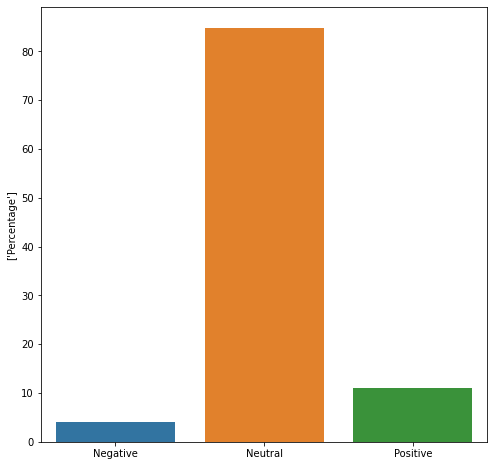

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel(["Percentage"])
plt.show()

In [20]:
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
1,1.0,0.0,0.0,-0.3182,lost,-1
22,1.0,0.0,0.0,-0.3182,lost,-1
26,1.0,0.0,0.0,-0.1027,Nah,-1
27,1.0,0.0,0.0,-0.1027,nah,-1
28,1.0,0.0,0.0,-0.1027,nah,-1


In [21]:
print(df_positive_negative.label.value_counts())

 1    213779
-1     80022
Name: label, dtype: int64


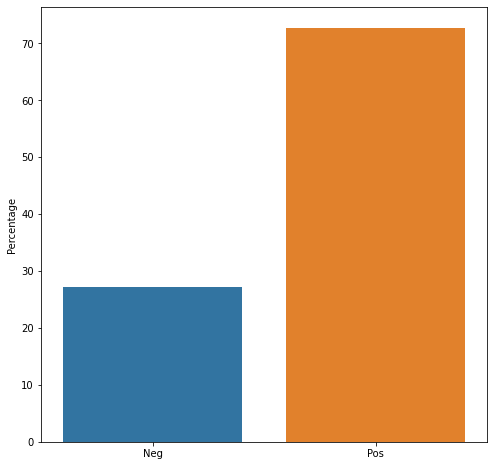

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_positive_negative.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Neg', 'Pos'])
ax.set_ylabel('Percentage')
plt.show()

Basically, compared to redditors, animation youtubers are more 'positive'

Now, per channelID:

In [26]:
channelId_to_df = {}
for channelId in LIST_OF_CHANNEL_IDS:
    for words in wordCloud[channelId]:
        pol_score = sia.polarity_scores(words)
        pol_score['words']=words
        results.append(pol_score)
    pd.set_option('display.max_columns', None, 'max_colwidth', None)
    df = pd.DataFrame.from_records(results)
    channelId_to_df[channelId] = df

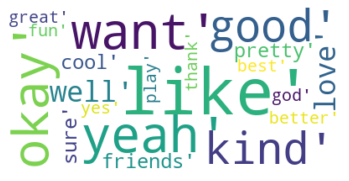

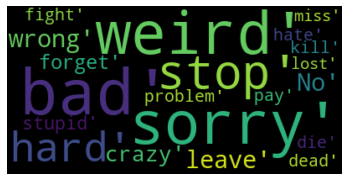

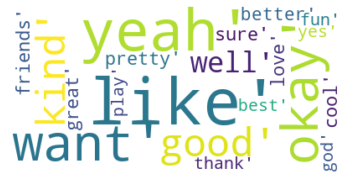

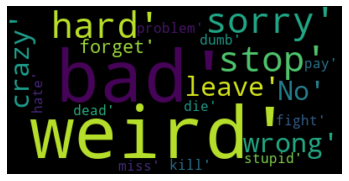

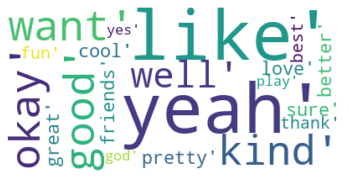

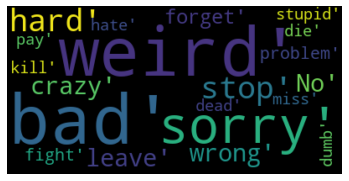

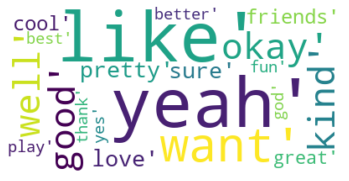

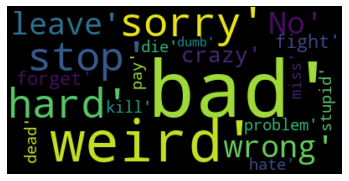

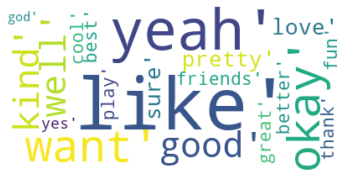

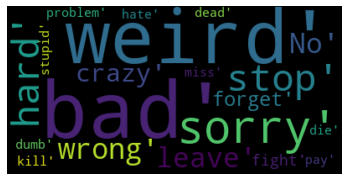

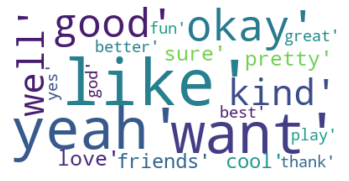

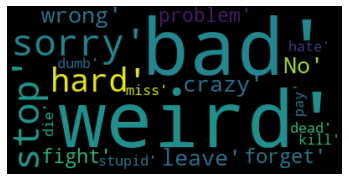

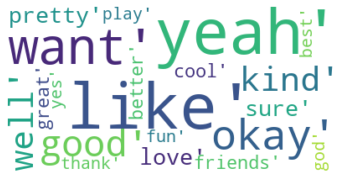

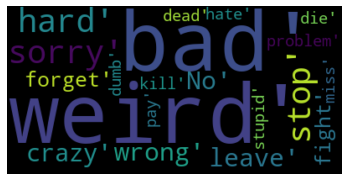

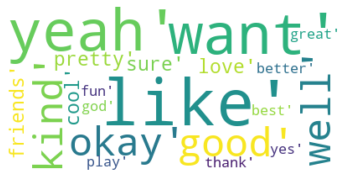

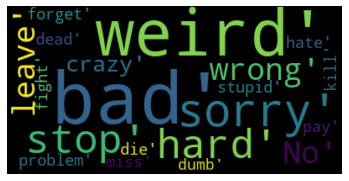

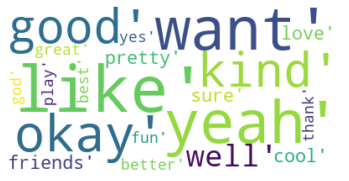

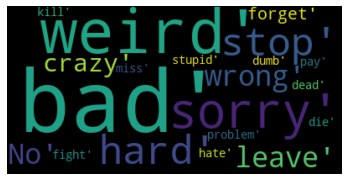

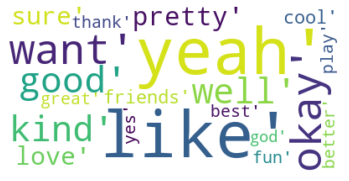

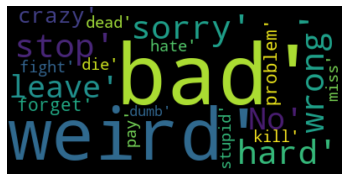

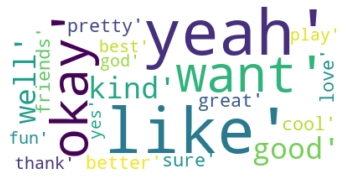

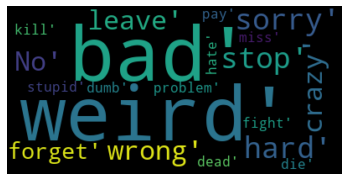

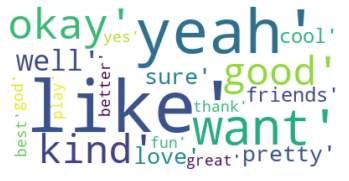

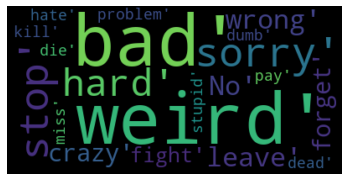

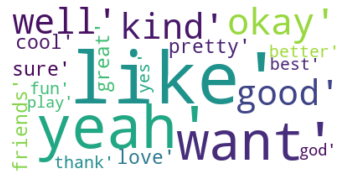

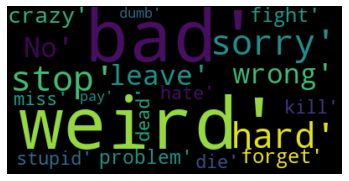

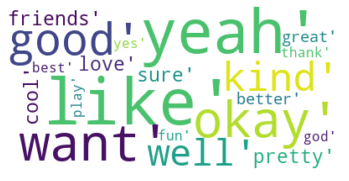

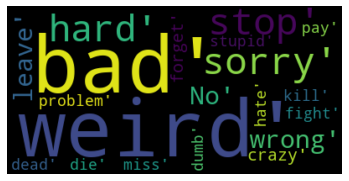

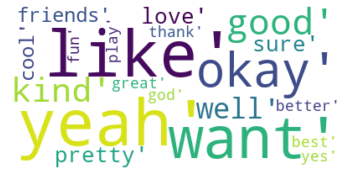

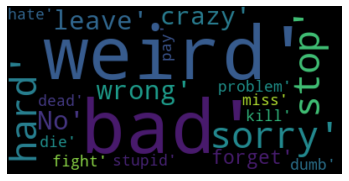

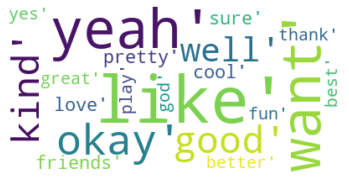

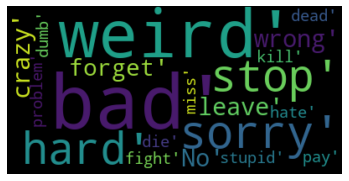

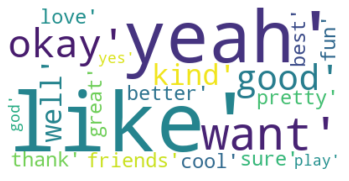

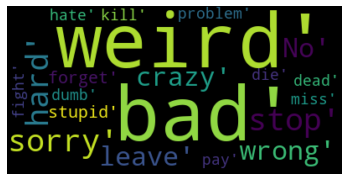

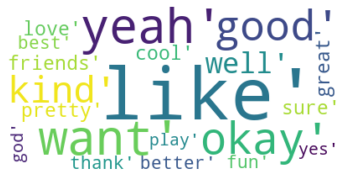

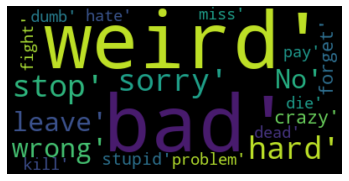

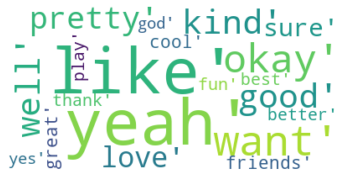

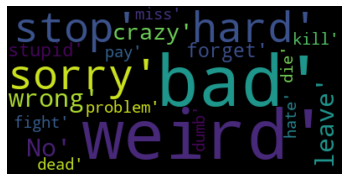

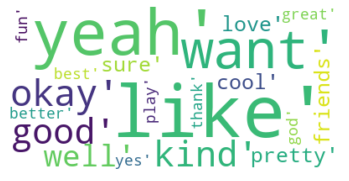

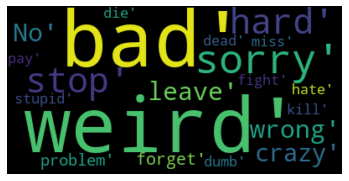

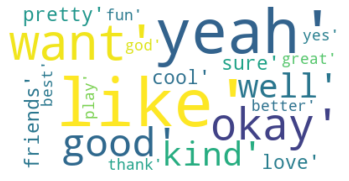

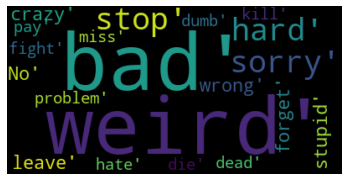

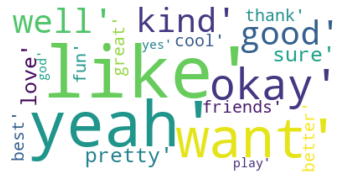

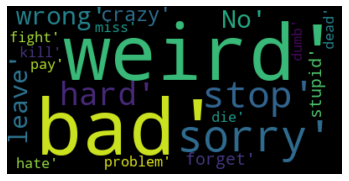

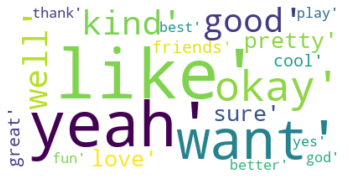

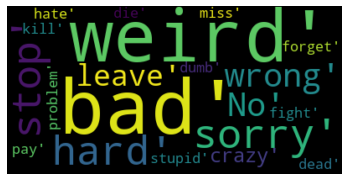

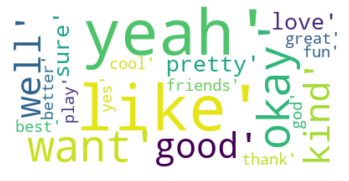

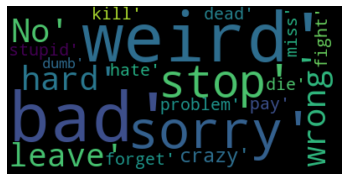

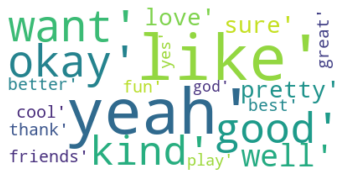

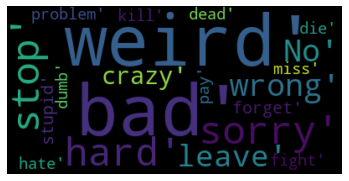

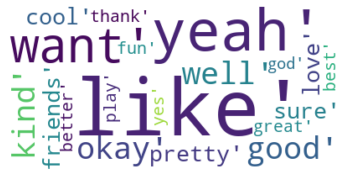

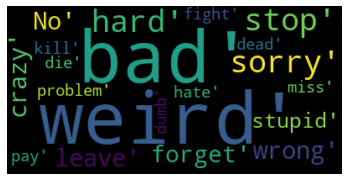

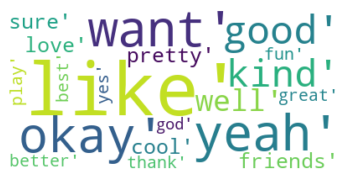

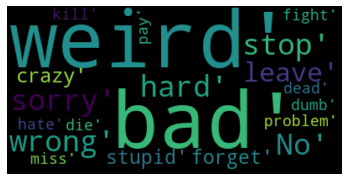

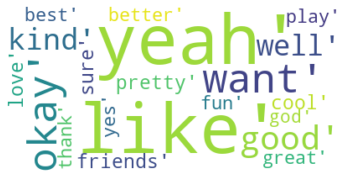

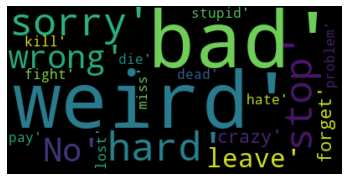

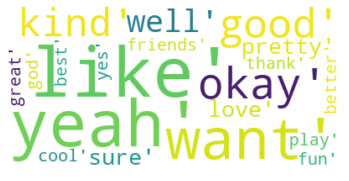

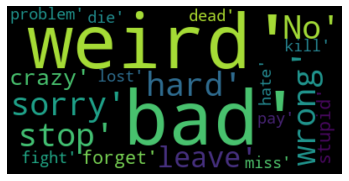

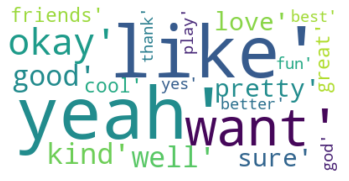

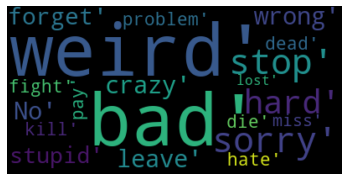

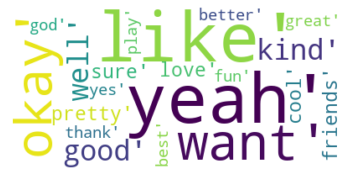

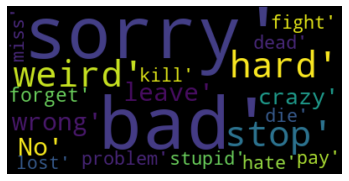

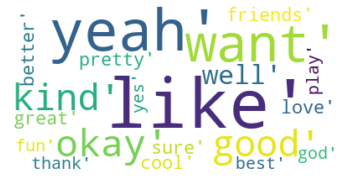

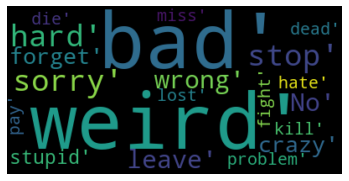

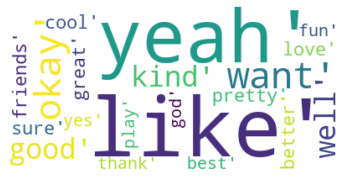

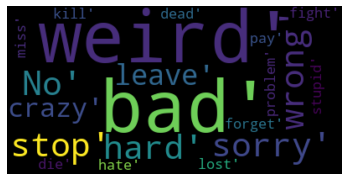

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for channelId in LIST_OF_CHANNEL_IDS:
    print(channelId,": ", name)
    target_df = channelId_to_df[channelId]
    positive_words = list(target_df.loc[target_df['pos']==1].words)
    positive_frequency = FreqDist(positive_words)
    pos_freq = positive_frequency.most_common(20)
    negative_words = list(target_df.loc[target_df['neg']==1].words)
    negative_frequency = FreqDist(negative_words)
    neg_freq = negative_frequency.most_common(20)
    pos_words = [str(p) for p in pos_freq]
    pos_words_str = ', '.join(pos_words)
    neg_words = [str(n) for n in neg_freq]
    neg_words_str = ', '.join(neg_words)

    wordcloud_positive = WordCloud(background_color='white').generate(pos_words_str)
    wordcloud_negative = WordCloud().generate(neg_words_str)

    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis("off")
    plt.show()